In [1]:
from services.load_dataset import load_data
from services.modeling import create_sequences, apply_smote, train_and_plot_results
import pickle

X_train, X_val, X_test, y_train, y_val, y_test  = load_data(data_folder='data')

X_train_seq_datasets_original = []
y_train_seq_datasets_original = []
X_train_seq_datasets = []
y_train_seq_datasets = []

best_hp = pickle.load(open('model/best_hp.pkl', 'rb'))

# Vary the X_train and y_train size to see how it affects the privacy
# Take last 90%, 80%, ... 10% of the dataset
for i in range(1, 21):
    X_train_ds = X_train[:int(len(X_train) * i / 20)]
    y_train_ds = y_train[:int(len(y_train) * i / 20)]
    X_train_seq_original, y_train_seq_original = create_sequences(X_train_ds, y_train_ds, best_hp['sequence_length'])
    X_train_seq, y_train_seq = apply_smote(X_train_seq_original, y_train_seq_original, sampling_strategy=0.25)

    X_train_seq_datasets_original.append(X_train_seq_original)
    y_train_seq_datasets_original.append(y_train_seq_original)
    X_train_seq_datasets.append(X_train_seq)
    y_train_seq_datasets.append(y_train_seq)
    

X_train_seq, y_train_seq = X_train_seq_datasets[-1], y_train_seq_datasets[-1]
X_val_seq, y_val_seq = create_sequences(X_val, y_val, best_hp['sequence_length'])
X_test_seq, y_test_seq = create_sequences(X_test, y_test, best_hp['sequence_length'])

c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\e

In [2]:
import pandas as pd
# count the number of classes and percentages in the training dataset
print('Number of classes in the training dataset')
print(pd.Series(y_train).value_counts())
print(f'Percentage of class 0: {pd.Series(y_train).value_counts()[0] / len(y_train) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_train).value_counts()[1] / len(y_train) * 100:.2f}%')
print('Number of classes in the validation dataset')
print(pd.Series(y_val).value_counts())
print(f'Percentage of class 0: {pd.Series(y_val).value_counts()[0] / len(y_val) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_val).value_counts()[1] / len(y_val) * 100:.2f}%')
print('Number of classes in the test dataset')
print(pd.Series(y_test).value_counts())
print(f'Percentage of class 0: {pd.Series(y_test).value_counts()[0] / len(y_test) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_test).value_counts()[1] / len(y_test) * 100:.2f}%')

print('Number of classes in the training dataset after applying SMOTE')
print(pd.Series(y_train_seq).value_counts())
print(f'Percentage of class 0: {pd.Series(y_train_seq).value_counts()[0] / len(y_train_seq) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_train_seq).value_counts()[1] / len(y_train_seq) * 100:.2f}%')

Number of classes in the training dataset
0.0    157515
1.0       353
Name: count, dtype: int64
Percentage of class 0: 99.78%
Percentage of class 1: 0.22%
Number of classes in the validation dataset
0.0    50743
1.0       40
Name: count, dtype: int64
Percentage of class 0: 99.92%
Percentage of class 1: 0.08%
Number of classes in the test dataset
0.0    76057
1.0       99
Name: count, dtype: int64
Percentage of class 0: 99.87%
Percentage of class 1: 0.13%
Number of classes in the training dataset after applying SMOTE
0    151967
1     37991
Name: count, dtype: int64
Percentage of class 0: 80.00%
Percentage of class 1: 20.00%


X_train_seq shape: (9368, 20, 29)
y_train_seq shape: (9368,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)

Epoch 1/10


147/147 [==============================] - 38s 202ms/step - loss: 0.1356 - accuracy: 0.7419 - precision: 0.3904 - recall: 0.5184 - auc: 0.7348 - val_loss: 0.1165 - val_accuracy: 0.8889 - val_precision: 0.0683 - val_recall: 0.5236 - val_auc: 0.7902
Epoch 2/10
147/147 [==============================] - 26s 179ms/step - loss: 0.0559 - accuracy: 0.9413 - precision: 0.8973 - recall: 0.7977 - auc: 0.9664 - val_loss: 0.0431 - val_accuracy: 0.9712 - val_precision: 0.2401 - val_recall: 0.4480 - val_auc: 0.8641
Epoch 3/10
147/147 [==============================] - 26s 180ms/step - loss: 0.0273 - accuracy: 0.9645 - precision: 0.9583 - recall: 0.8596 - auc: 0.9912 - val_loss: 0.0229 - val_accuracy: 0.9840 - val_precision: 0.4462 - val_recall: 0.4089 - val_auc: 0.8703
Epoch 4/10
147/147 [==============================] - 26s 179ms/step - loss: 0.0178 - accuracy: 0.97

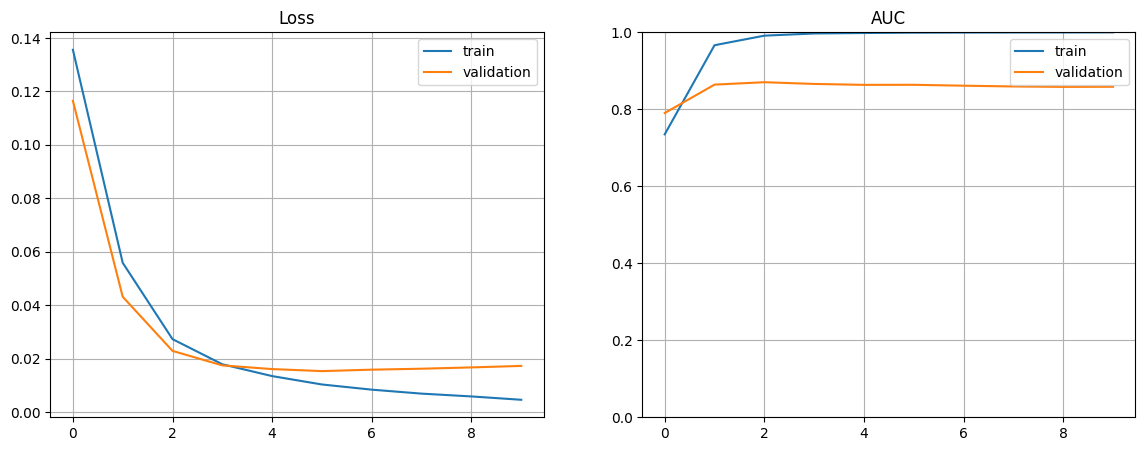

2380/2380 [==============================] - 44s 18ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.76      0.50      0.60      1857

    accuracy                           0.98     76137
   macro avg       0.87      0.75      0.80     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


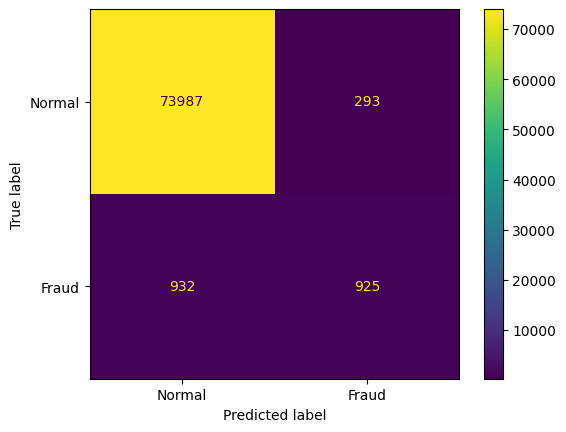

X_train_seq shape: (18191, 20, 29)
y_train_seq shape: (18191,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
285/285 [==============================] - 45s 135ms/step - loss: 0.1146 - accuracy: 0.8151 - precision: 0.5459 - recall: 0.4480 - auc: 0.7784 - val_loss: 0.1127 - val_accuracy: 0.8824 - val_precision: 0.0706 - val_recall: 0.5803 - val_auc: 0.7898
Epoch 2/10
285/285 [==============================] - 35s 124ms/step - loss: 0.0535 - accuracy: 0.9367 - precision: 0.8728 - recall: 0.7999 - auc: 0.9592 - val_loss: 0.0670 - val_accuracy: 0.9506 - val_precision: 0.1651 - val_recall: 0.5870 - val_auc: 0.8167
Epoch 3/10
285/285 [==============================] - 35s 124ms/step - loss: 0.0407 - accuracy: 0.9477 - precision: 0.8835 - recall: 0.8507 - auc: 0.9771 - val_loss: 0.0619 - val_accuracy: 0.9413 - val_precision: 0.1454 - val_recall: 0.6194 - val_auc: 0.8110
Epoch 4/10
285/285 [==============================] - 34s 120ms/step - loss: 0.0332 - accuracy: 0.954

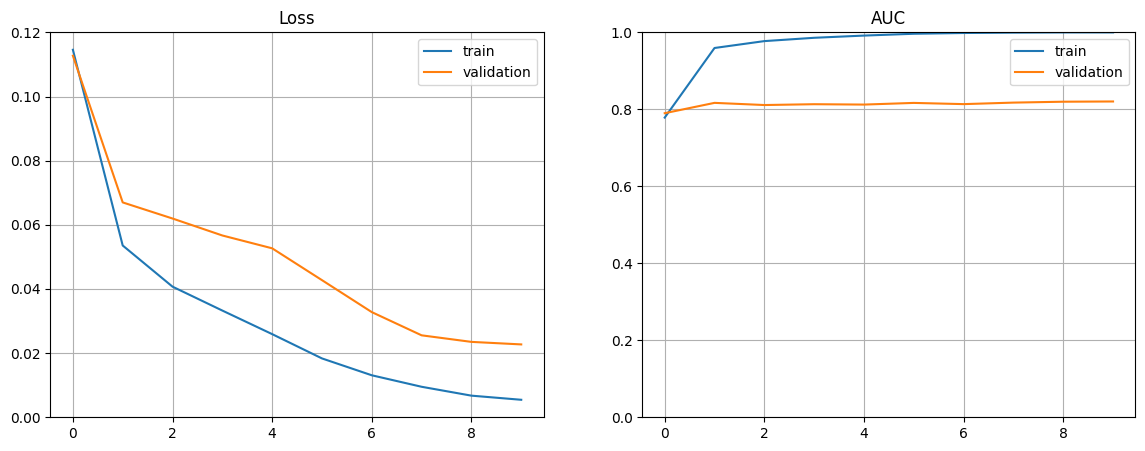

2380/2380 [==============================] - 43s 18ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     74280
           1       0.54      0.65      0.59      1857

    accuracy                           0.98     76137
   macro avg       0.76      0.82      0.79     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


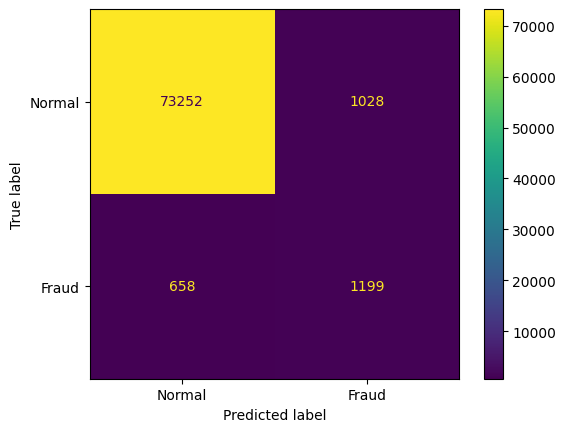

X_train_seq shape: (27656, 20, 29)
y_train_seq shape: (27656,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
433/433 [==============================] - 52s 105ms/step - loss: 0.1003 - accuracy: 0.8323 - precision: 0.5956 - recall: 0.5033 - auc: 0.8345 - val_loss: 0.0429 - val_accuracy: 0.9758 - val_precision: 0.2593 - val_recall: 0.3563 - val_auc: 0.8083
Epoch 2/10
433/433 [==============================] - 45s 103ms/step - loss: 0.0439 - accuracy: 0.9419 - precision: 0.8875 - recall: 0.8127 - auc: 0.9733 - val_loss: 0.0474 - val_accuracy: 0.9477 - val_precision: 0.1456 - val_recall: 0.5304 - val_auc: 0.8134
Epoch 3/10
433/433 [==============================] - 41s 94ms/step - loss: 0.0328 - accuracy: 0.9560 - precision: 0.9050 - recall: 0.8713 - auc: 0.9850 - val_loss: 0.0493 - val_accuracy: 0.9339 - val_precision: 0.1216 - val_recall: 0.5668 - val_auc: 0.8179
Epoch 4/10
433/433 [==============================] - 43s 99ms/step - loss: 0.0220 - accuracy: 0.9713 

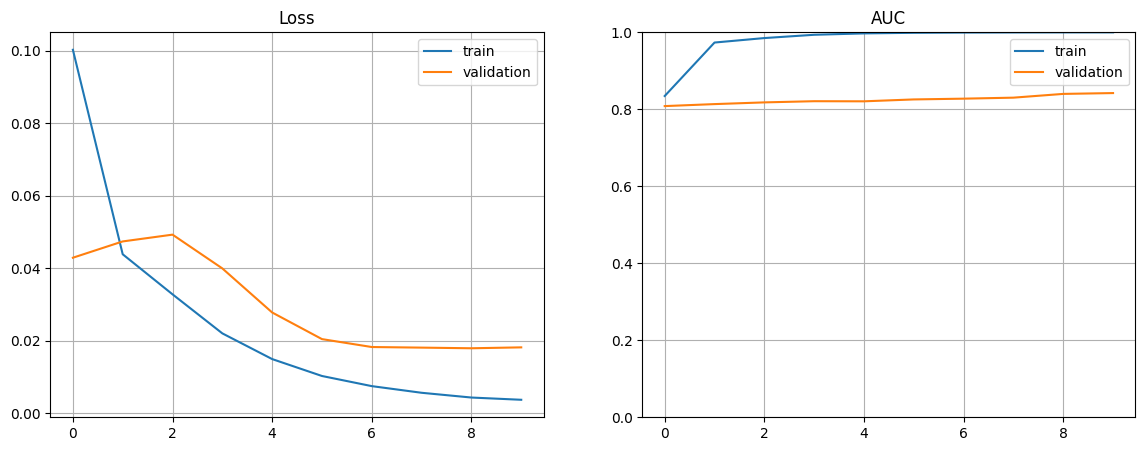

2380/2380 [==============================] - 42s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.83      0.47      0.60      1857

    accuracy                           0.98     76137
   macro avg       0.91      0.74      0.80     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


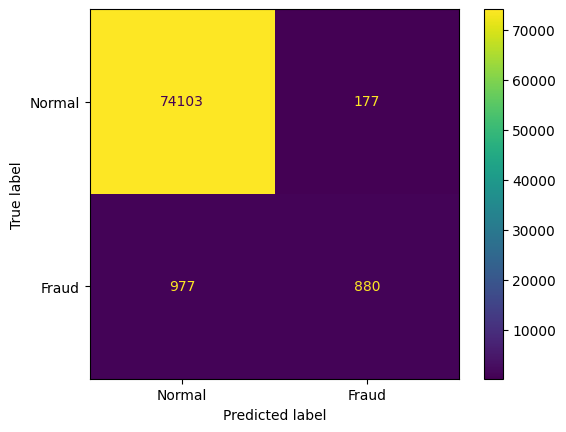

X_train_seq shape: (37192, 20, 29)
y_train_seq shape: (37192,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
582/582 [==============================] - 59s 91ms/step - loss: 0.0841 - accuracy: 0.8659 - precision: 0.6719 - recall: 0.6443 - auc: 0.8957 - val_loss: 0.0277 - val_accuracy: 0.9828 - val_precision: 0.4149 - val_recall: 0.4372 - val_auc: 0.8294
Epoch 2/10
582/582 [==============================] - 53s 91ms/step - loss: 0.0362 - accuracy: 0.9519 - precision: 0.9100 - recall: 0.8427 - auc: 0.9824 - val_loss: 0.0274 - val_accuracy: 0.9797 - val_precision: 0.3597 - val_recall: 0.4966 - val_auc: 0.8270
Epoch 3/10
582/582 [==============================] - 51s 88ms/step - loss: 0.0246 - accuracy: 0.9675 - precision: 0.9330 - recall: 0.9025 - auc: 0.9921 - val_loss: 0.0219 - val_accuracy: 0.9819 - val_precision: 0.3943 - val_recall: 0.4507 - val_auc: 0.8226
Epoch 4/10
582/582 [==============================] - 53s 91ms/step - loss: 0.0151 - accuracy: 0.9820 - 

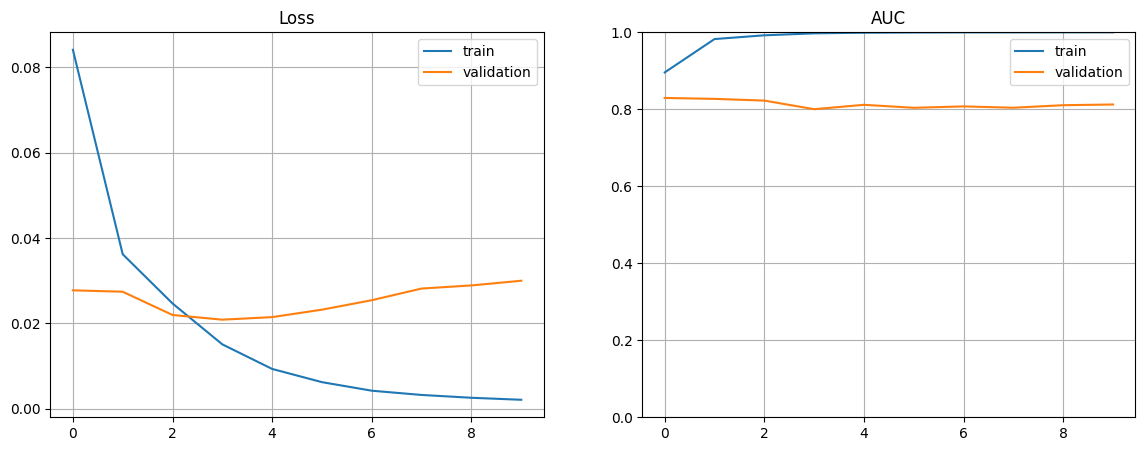

2380/2380 [==============================] - 43s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     74280
           1       0.70      0.55      0.62      1857

    accuracy                           0.98     76137
   macro avg       0.84      0.77      0.81     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


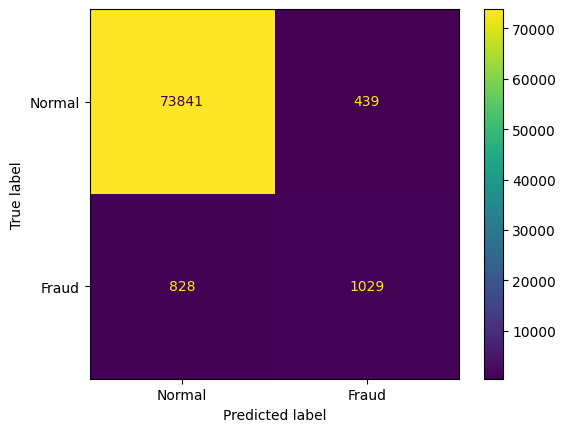

X_train_seq shape: (47010, 20, 29)
y_train_seq shape: (47010,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
735/735 [==============================] - 66s 80ms/step - loss: 0.0714 - accuracy: 0.8922 - precision: 0.7673 - recall: 0.6616 - auc: 0.9240 - val_loss: 0.0391 - val_accuracy: 0.9602 - val_precision: 0.1946 - val_recall: 0.5493 - val_auc: 0.8318
Epoch 2/10
735/735 [==============================] - 53s 72ms/step - loss: 0.0322 - accuracy: 0.9592 - precision: 0.9203 - recall: 0.8717 - auc: 0.9861 - val_loss: 0.0288 - val_accuracy: 0.9729 - val_precision: 0.2736 - val_recall: 0.5196 - val_auc: 0.8189
Epoch 3/10
735/735 [==============================] - 54s 73ms/step - loss: 0.0194 - accuracy: 0.9758 - precision: 0.9470 - recall: 0.9313 - auc: 0.9951 - val_loss: 0.0190 - val_accuracy: 0.9866 - val_precision: 0.5484 - val_recall: 0.4737 - val_auc: 0.8231
Epoch 4/10
735/735 [==============================] - 57s 77ms/step - loss: 0.0106 - accuracy: 0.9887 - 

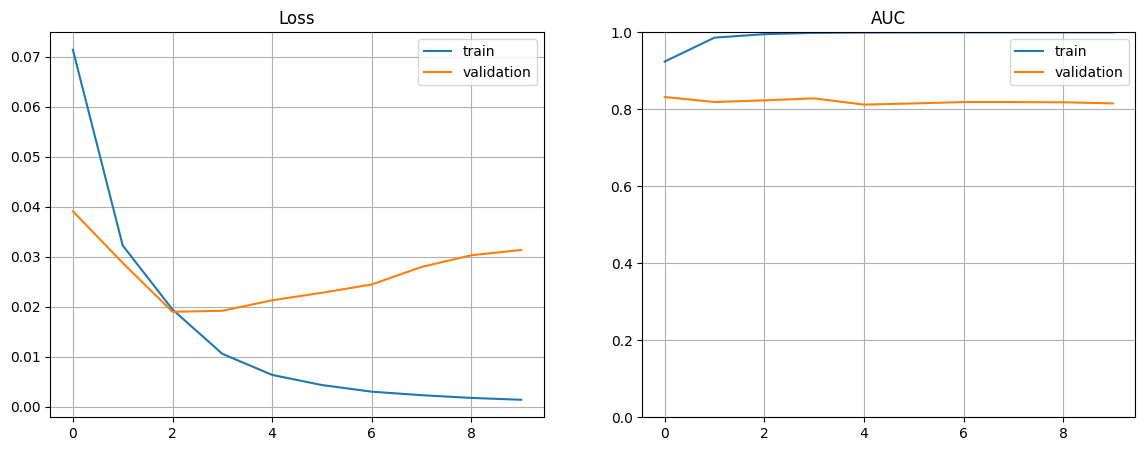

2380/2380 [==============================] - 42s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.89      0.50      0.64      1857

    accuracy                           0.99     76137
   macro avg       0.94      0.75      0.81     76137
weighted avg       0.99      0.99      0.98     76137

Confusion Matrix:


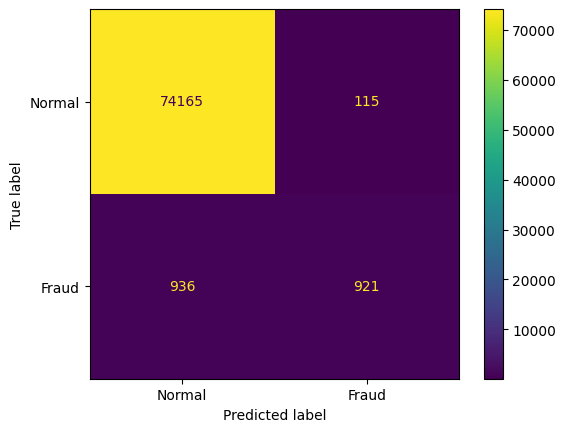

X_train_seq shape: (55928, 20, 29)
y_train_seq shape: (55928,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
874/874 [==============================] - 69s 71ms/step - loss: 0.0682 - accuracy: 0.9011 - precision: 0.7674 - recall: 0.7253 - auc: 0.9342 - val_loss: 0.0346 - val_accuracy: 0.9698 - val_precision: 0.2726 - val_recall: 0.6397 - val_auc: 0.8723
Epoch 2/10
874/874 [==============================] - 62s 71ms/step - loss: 0.0293 - accuracy: 0.9652 - precision: 0.9305 - recall: 0.8928 - auc: 0.9879 - val_loss: 0.0381 - val_accuracy: 0.9532 - val_precision: 0.1945 - val_recall: 0.7031 - val_auc: 0.8603
Epoch 3/10
874/874 [==============================] - 61s 70ms/step - loss: 0.0200 - accuracy: 0.9761 - precision: 0.9425 - recall: 0.9376 - auc: 0.9943 - val_loss: 0.0269 - val_accuracy: 0.9723 - val_precision: 0.2981 - val_recall: 0.6626 - val_auc: 0.8577
Epoch 4/10
874/874 [==============================] - 61s 70ms/step - loss: 0.0125 - accuracy: 0.9860 - 

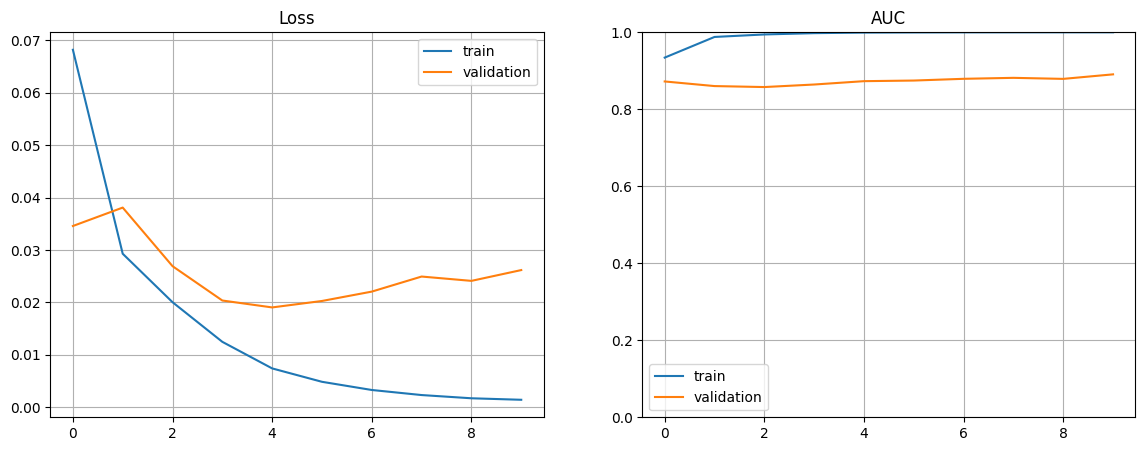

2380/2380 [==============================] - 43s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     74280
           1       0.69      0.64      0.66      1857

    accuracy                           0.98     76137
   macro avg       0.84      0.82      0.83     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


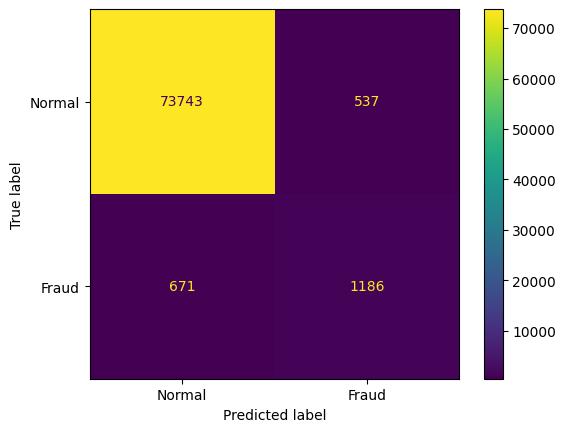

X_train_seq shape: (65570, 20, 29)
y_train_seq shape: (65570,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1025/1025 [==============================] - 80s 72ms/step - loss: 0.0593 - accuracy: 0.9209 - precision: 0.8363 - recall: 0.7514 - auc: 0.9507 - val_loss: 0.0469 - val_accuracy: 0.9468 - val_precision: 0.1643 - val_recall: 0.6478 - val_auc: 0.8238
Epoch 2/10
1025/1025 [==============================] - 66s 65ms/step - loss: 0.0254 - accuracy: 0.9716 - precision: 0.9402 - recall: 0.9163 - auc: 0.9906 - val_loss: 0.0331 - val_accuracy: 0.9654 - val_precision: 0.2413 - val_recall: 0.6397 - val_auc: 0.8209
Epoch 3/10
1025/1025 [==============================] - 69s 68ms/step - loss: 0.0163 - accuracy: 0.9821 - precision: 0.9533 - recall: 0.9572 - auc: 0.9958 - val_loss: 0.0221 - val_accuracy: 0.9839 - val_precision: 0.4598 - val_recall: 0.6019 - val_auc: 0.8143
Epoch 4/10
1025/1025 [==============================] - 69s 67ms/step - loss: 0.0099 - accuracy: 0

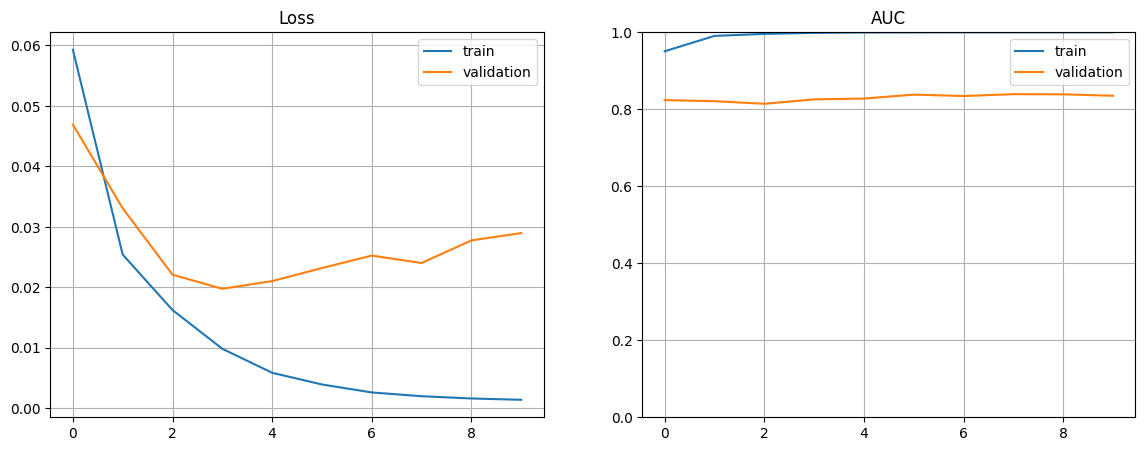

2380/2380 [==============================] - 42s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.81      0.61      0.70      1857

    accuracy                           0.99     76137
   macro avg       0.90      0.81      0.85     76137
weighted avg       0.99      0.99      0.99     76137

Confusion Matrix:


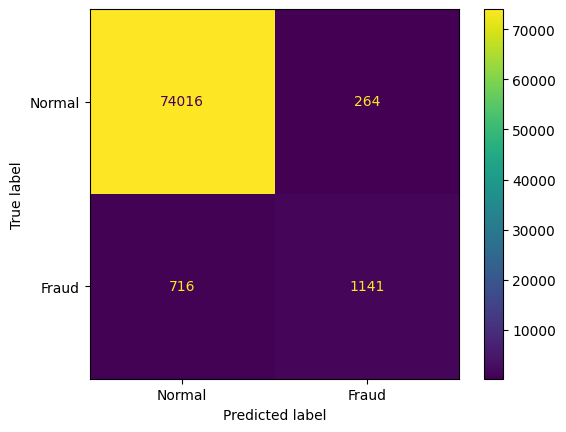

X_train_seq shape: (75212, 20, 29)
y_train_seq shape: (75212,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1176/1176 [==============================] - 86s 67ms/step - loss: 0.0570 - accuracy: 0.9235 - precision: 0.8330 - recall: 0.7725 - auc: 0.9542 - val_loss: 0.0226 - val_accuracy: 0.9851 - val_precision: 0.4910 - val_recall: 0.5493 - val_auc: 0.8522
Epoch 2/10
1176/1176 [==============================] - 73s 62ms/step - loss: 0.0271 - accuracy: 0.9708 - precision: 0.9420 - recall: 0.9100 - auc: 0.9888 - val_loss: 0.0166 - val_accuracy: 0.9888 - val_precision: 0.6345 - val_recall: 0.5506 - val_auc: 0.8617
Epoch 3/10
1176/1176 [==============================] - 74s 63ms/step - loss: 0.0177 - accuracy: 0.9809 - precision: 0.9545 - recall: 0.9501 - auc: 0.9950 - val_loss: 0.0168 - val_accuracy: 0.9901 - val_precision: 0.7220 - val_recall: 0.5223 - val_auc: 0.8725
Epoch 4/10
1176/1176 [==============================] - 77s 66ms/step - loss: 0.0104 - accuracy: 0

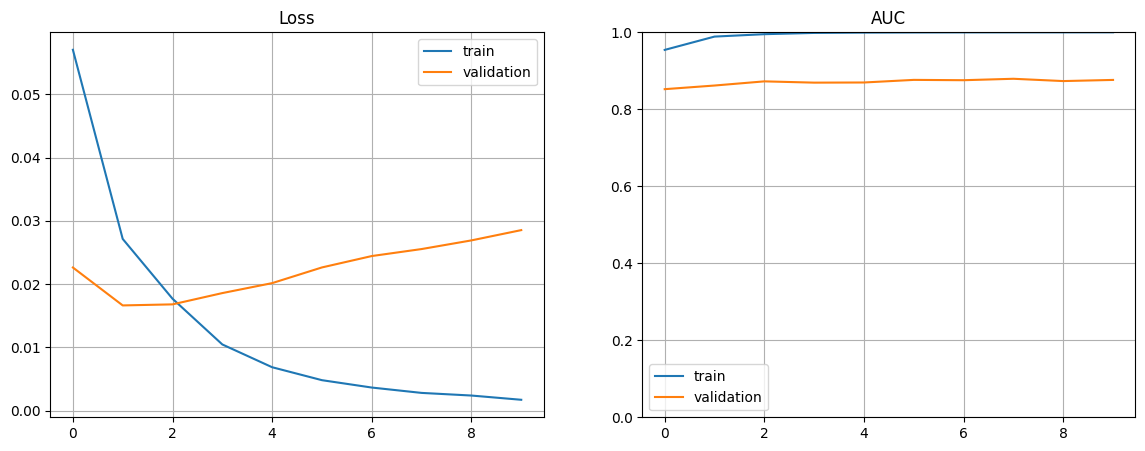

2380/2380 [==============================] - 42s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.91      0.50      0.65      1857

    accuracy                           0.99     76137
   macro avg       0.95      0.75      0.82     76137
weighted avg       0.99      0.99      0.98     76137

Confusion Matrix:


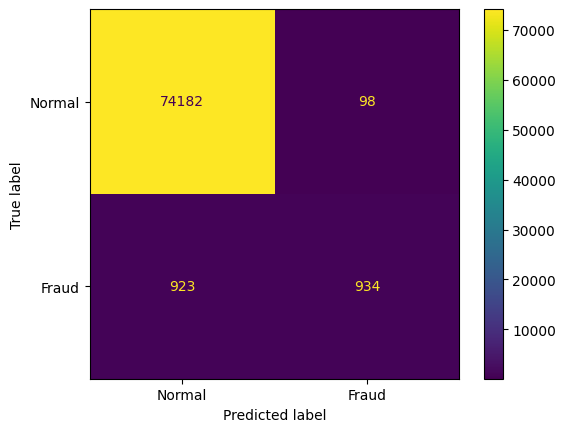

X_train_seq shape: (84753, 20, 29)
y_train_seq shape: (84753,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1325/1325 [==============================] - 93s 64ms/step - loss: 0.0547 - accuracy: 0.9305 - precision: 0.8547 - recall: 0.7860 - auc: 0.9567 - val_loss: 0.0218 - val_accuracy: 0.9843 - val_precision: 0.4671 - val_recall: 0.5560 - val_auc: 0.8493
Epoch 2/10
1325/1325 [==============================] - 83s 63ms/step - loss: 0.0258 - accuracy: 0.9717 - precision: 0.9461 - recall: 0.9105 - auc: 0.9897 - val_loss: 0.0154 - val_accuracy: 0.9901 - val_precision: 0.7254 - val_recall: 0.5169 - val_auc: 0.8602
Epoch 3/10
1325/1325 [==============================] - 83s 63ms/step - loss: 0.0153 - accuracy: 0.9840 - precision: 0.9636 - recall: 0.9563 - auc: 0.9962 - val_loss: 0.0173 - val_accuracy: 0.9888 - val_precision: 0.6491 - val_recall: 0.4993 - val_auc: 0.8557
Epoch 4/10
1325/1325 [==============================] - 84s 63ms/step - loss: 0.0091 - accuracy: 0

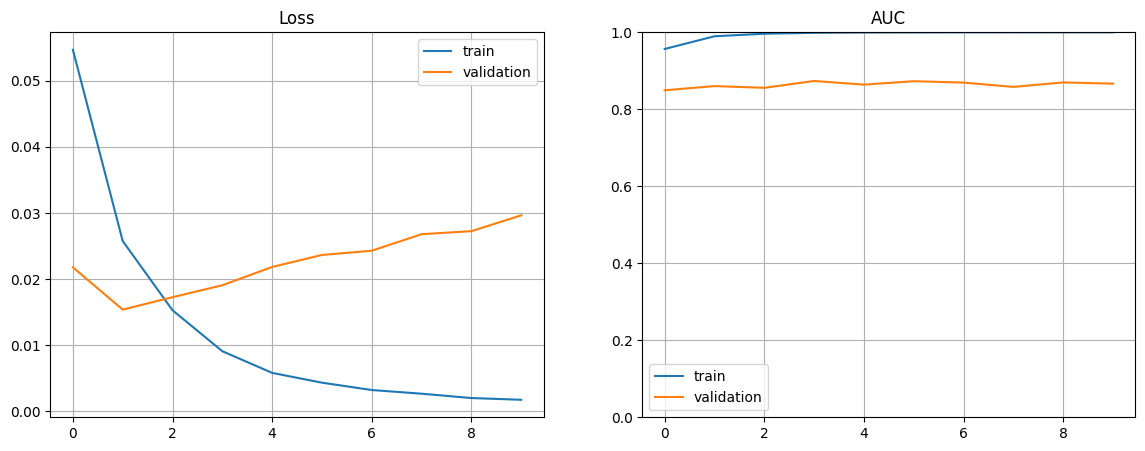

2380/2380 [==============================] - 42s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.92      0.54      0.68      1857

    accuracy                           0.99     76137
   macro avg       0.95      0.77      0.84     76137
weighted avg       0.99      0.99      0.99     76137

Confusion Matrix:


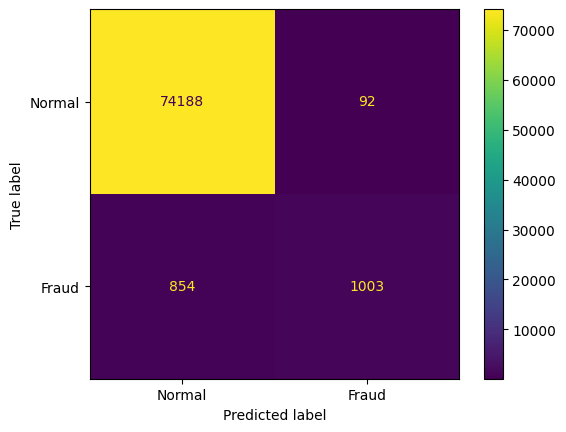

X_train_seq shape: (94283, 20, 29)
y_train_seq shape: (94283,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1474/1474 [==============================] - 105s 67ms/step - loss: 0.0549 - accuracy: 0.9269 - precision: 0.8492 - recall: 0.7713 - auc: 0.9551 - val_loss: 0.0190 - val_accuracy: 0.9867 - val_precision: 0.5441 - val_recall: 0.5574 - val_auc: 0.8433
Epoch 2/10
1474/1474 [==============================] - 98s 66ms/step - loss: 0.0236 - accuracy: 0.9750 - precision: 0.9539 - recall: 0.9194 - auc: 0.9909 - val_loss: 0.0161 - val_accuracy: 0.9900 - val_precision: 0.7355 - val_recall: 0.4953 - val_auc: 0.8475
Epoch 3/10
1474/1474 [==============================] - 97s 66ms/step - loss: 0.0133 - accuracy: 0.9866 - precision: 0.9725 - recall: 0.9604 - auc: 0.9970 - val_loss: 0.0184 - val_accuracy: 0.9891 - val_precision: 0.7136 - val_recall: 0.4238 - val_auc: 0.8569
Epoch 4/10
1474/1474 [==============================] - 99s 67ms/step - loss: 0.0080 - accuracy: 

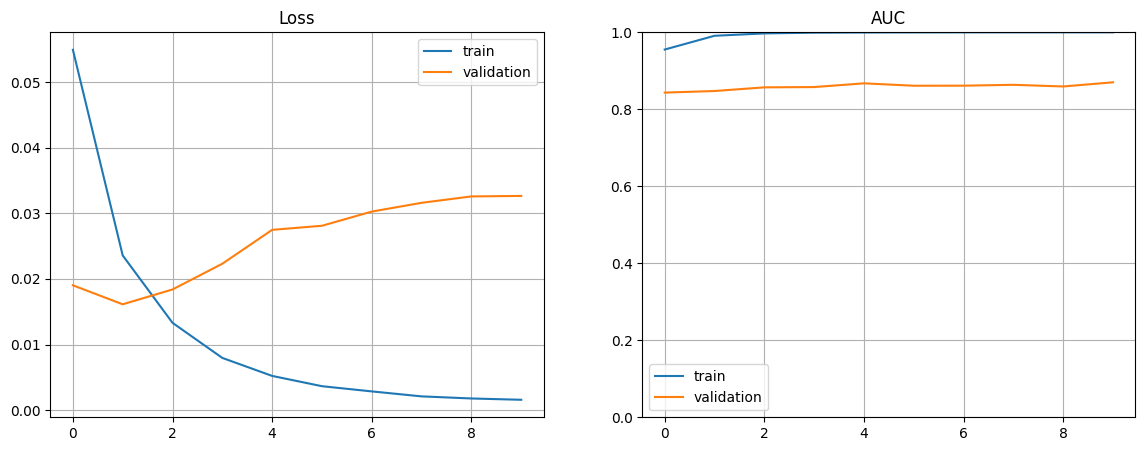

2380/2380 [==============================] - 42s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.91      0.47      0.62      1857

    accuracy                           0.99     76137
   macro avg       0.95      0.74      0.81     76137
weighted avg       0.99      0.99      0.98     76137

Confusion Matrix:


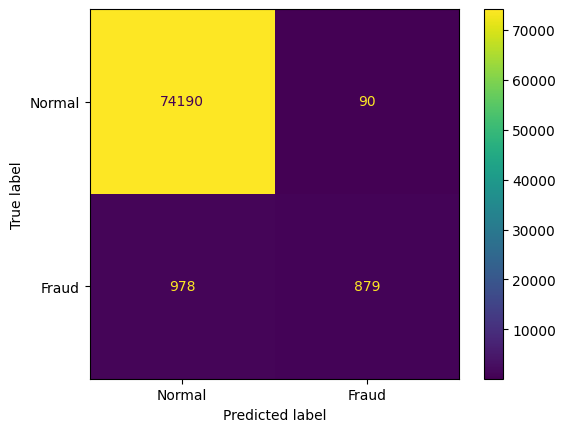

X_train_seq shape: (103818, 20, 29)
y_train_seq shape: (103818,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1623/1623 [==============================] - 107s 61ms/step - loss: 0.0501 - accuracy: 0.9366 - precision: 0.8749 - recall: 0.7966 - auc: 0.9634 - val_loss: 0.0174 - val_accuracy: 0.9889 - val_precision: 0.6335 - val_recall: 0.5762 - val_auc: 0.8587
Epoch 2/10
1623/1623 [==============================] - 101s 62ms/step - loss: 0.0216 - accuracy: 0.9779 - precision: 0.9593 - recall: 0.9288 - auc: 0.9922 - val_loss: 0.0158 - val_accuracy: 0.9906 - val_precision: 0.7548 - val_recall: 0.5277 - val_auc: 0.8622
Epoch 3/10
1623/1623 [==============================] - 103s 63ms/step - loss: 0.0118 - accuracy: 0.9880 - precision: 0.9744 - recall: 0.9651 - auc: 0.9975 - val_loss: 0.0194 - val_accuracy: 0.9905 - val_precision: 0.7856 - val_recall: 0.4845 - val_auc: 0.8653
Epoch 4/10
1623/1623 [==============================] - 102s 63ms/step - loss: 0.0070 - accur

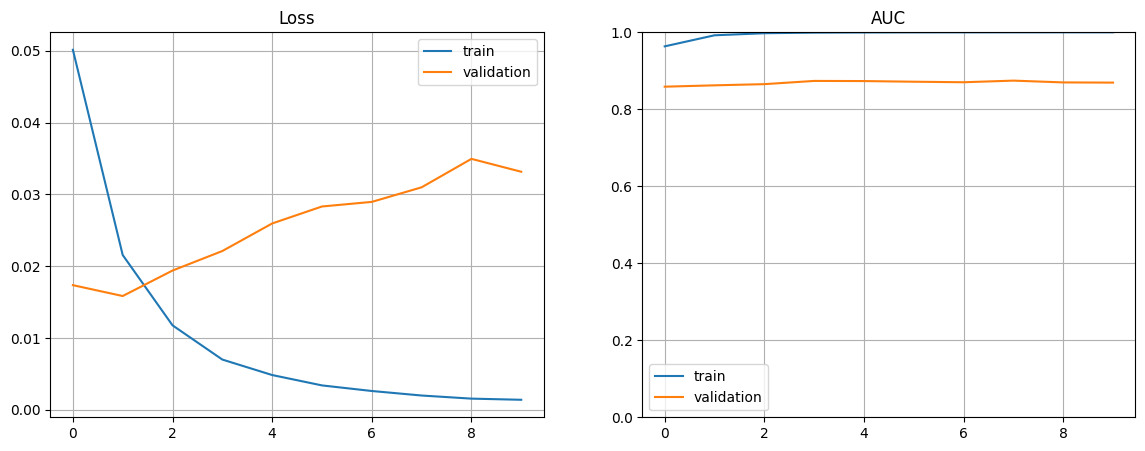

2380/2380 [==============================] - 45s 18ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.85      0.57      0.68      1857

    accuracy                           0.99     76137
   macro avg       0.92      0.79      0.84     76137
weighted avg       0.99      0.99      0.99     76137

Confusion Matrix:


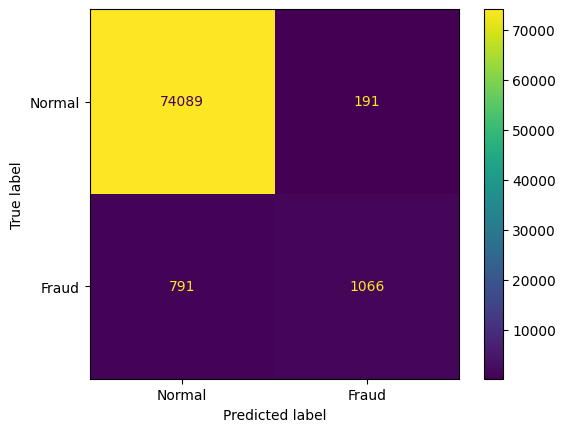

X_train_seq shape: (113385, 20, 29)
y_train_seq shape: (113385,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1772/1772 [==============================] - 115s 62ms/step - loss: 0.0496 - accuracy: 0.9370 - precision: 0.8846 - recall: 0.7878 - auc: 0.9634 - val_loss: 0.0191 - val_accuracy: 0.9882 - val_precision: 0.6023 - val_recall: 0.5560 - val_auc: 0.8342
Epoch 2/10
1772/1772 [==============================] - 105s 59ms/step - loss: 0.0211 - accuracy: 0.9798 - precision: 0.9612 - recall: 0.9367 - auc: 0.9924 - val_loss: 0.0166 - val_accuracy: 0.9900 - val_precision: 0.7241 - val_recall: 0.5101 - val_auc: 0.8409
Epoch 3/10
1772/1772 [==============================] - 107s 60ms/step - loss: 0.0132 - accuracy: 0.9870 - precision: 0.9675 - recall: 0.9675 - auc: 0.9969 - val_loss: 0.0197 - val_accuracy: 0.9893 - val_precision: 0.7220 - val_recall: 0.4345 - val_auc: 0.8500
Epoch 4/10
1772/1772 [==============================] - 110s 62ms/step - loss: 0.0085 - accur

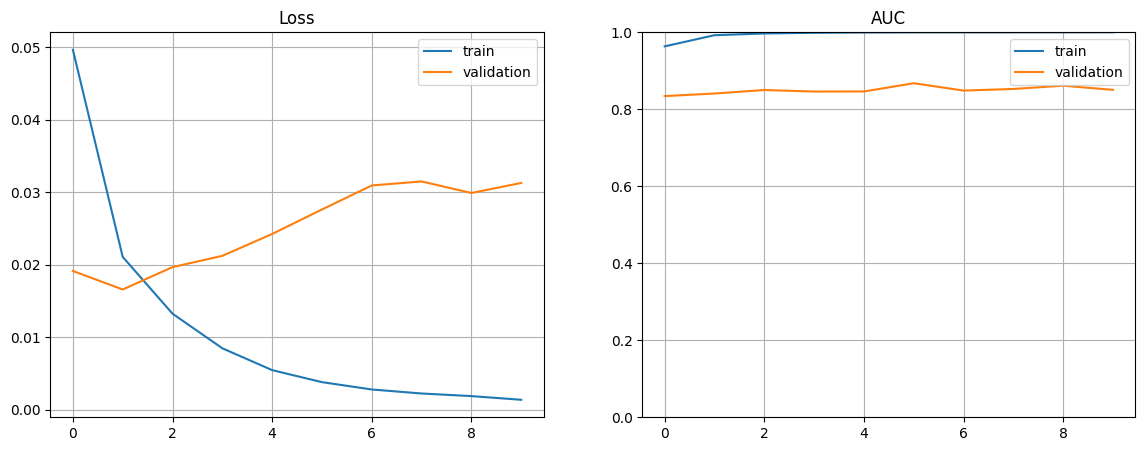

2380/2380 [==============================] - 42s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.94      0.48      0.64      1857

    accuracy                           0.99     76137
   macro avg       0.97      0.74      0.82     76137
weighted avg       0.99      0.99      0.98     76137

Confusion Matrix:


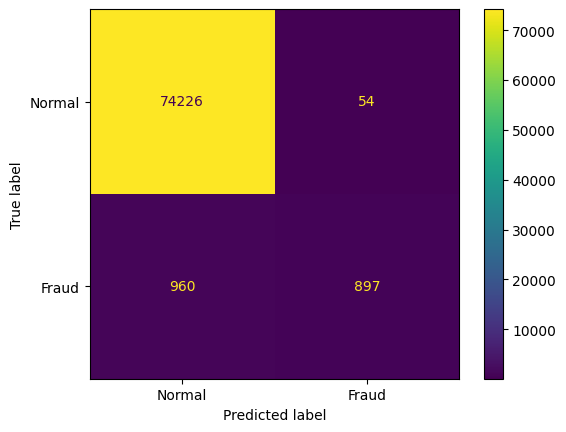

X_train_seq shape: (123020, 20, 29)
y_train_seq shape: (123020,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1923/1923 [==============================] - 142s 70ms/step - loss: 0.0513 - accuracy: 0.9335 - precision: 0.8793 - recall: 0.7737 - auc: 0.9586 - val_loss: 0.0154 - val_accuracy: 0.9898 - val_precision: 0.7362 - val_recall: 0.4669 - val_auc: 0.8453
Epoch 2/10
1923/1923 [==============================] - 127s 66ms/step - loss: 0.0201 - accuracy: 0.9799 - precision: 0.9629 - recall: 0.9357 - auc: 0.9929 - val_loss: 0.0208 - val_accuracy: 0.9892 - val_precision: 0.7645 - val_recall: 0.3725 - val_auc: 0.8578
Epoch 3/10
1923/1923 [==============================] - 126s 65ms/step - loss: 0.0114 - accuracy: 0.9882 - precision: 0.9758 - recall: 0.9648 - auc: 0.9977 - val_loss: 0.0251 - val_accuracy: 0.9887 - val_precision: 0.7478 - val_recall: 0.3441 - val_auc: 0.8602
Epoch 4/10
1923/1923 [==============================] - 126s 66ms/step - loss: 0.0072 - accur

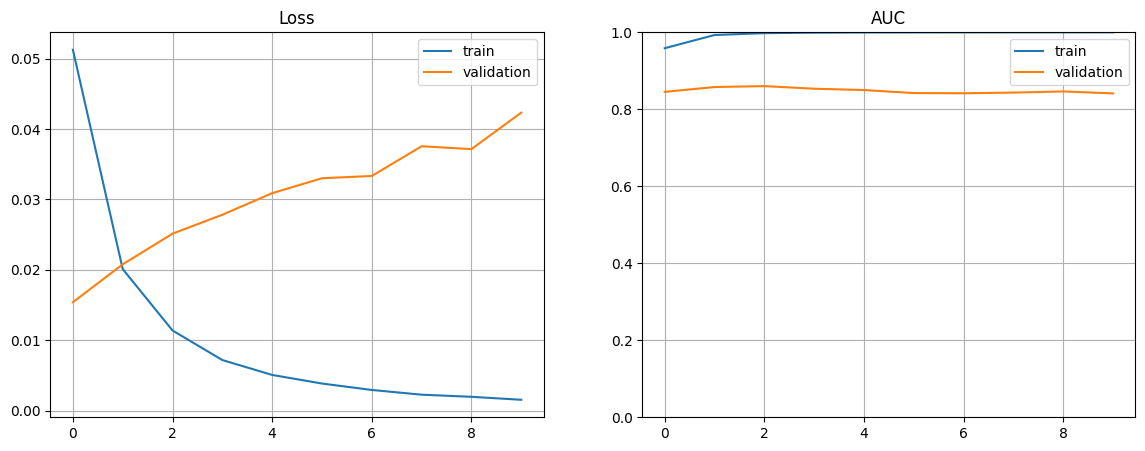

2380/2380 [==============================] - 40s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.99      0.41      0.58      1857

    accuracy                           0.99     76137
   macro avg       0.99      0.71      0.79     76137
weighted avg       0.99      0.99      0.98     76137

Confusion Matrix:


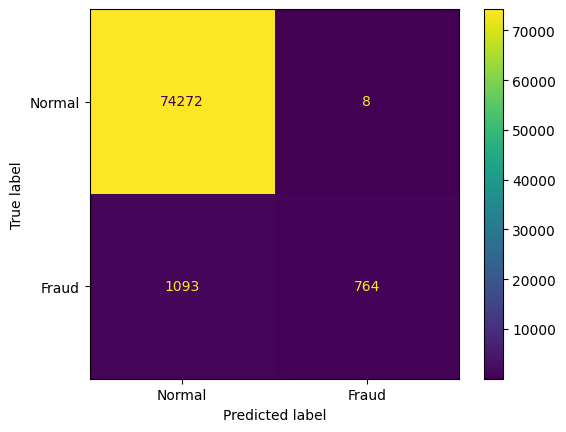

X_train_seq shape: (132686, 20, 29)
y_train_seq shape: (132686,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
2072/2074 [============================>.] - ETA: 0s - loss: 0.0505 - accuracy: 0.9368 - precision: 0.8966 - recall: 0.7732 - auc: 0.9598

KeyboardInterrupt: 

In [3]:
models = []
hists = []
for X_train_seq, y_train_seq in zip(X_train_seq_datasets, y_train_seq_datasets):
    print(f'X_train_seq shape: {X_train_seq.shape}')
    print(f'y_train_seq shape: {y_train_seq.shape}')
    print(f'X_val_seq shape: {X_val_seq.shape}')
    print(f'y_val_seq shape: {y_val_seq.shape}')
    model, hist = train_and_plot_results(X_train_seq, y_train_seq, X_test_seq, y_test_seq, best_hp, X_val=X_val_seq, y_val=y_val_seq)
    models.append(model)
    hists.append(hist)




2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 10/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 10/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 10/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  5/247 [..............................] - ETA: 3s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 17s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  1/247 [..............................] - ETA: 9s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 18s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  8/247 [..............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  6/247 [..............................] - ETA: 3s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  1/247 [..............................] - ETA: 9s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  1/247 [..............................] - ETA: 8s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 10/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 11/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  7/247 [..............................] - ETA: 2s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  7/247 [..............................] - ETA: 2s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

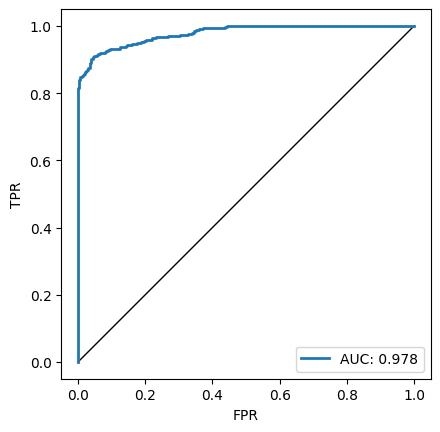

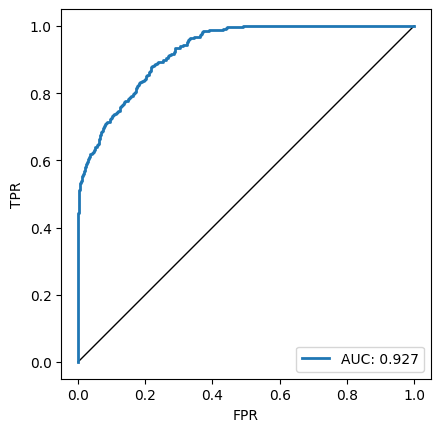

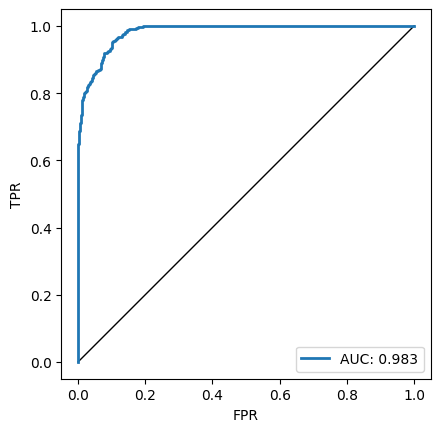

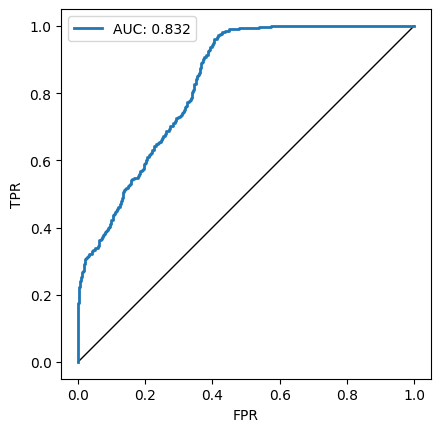

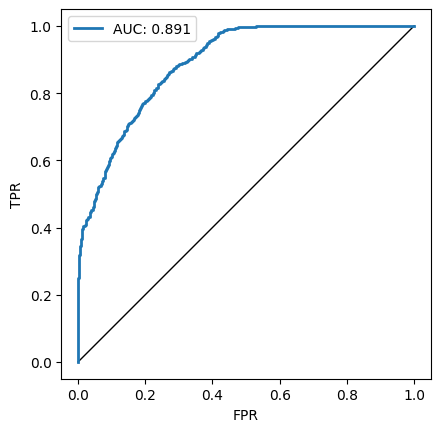

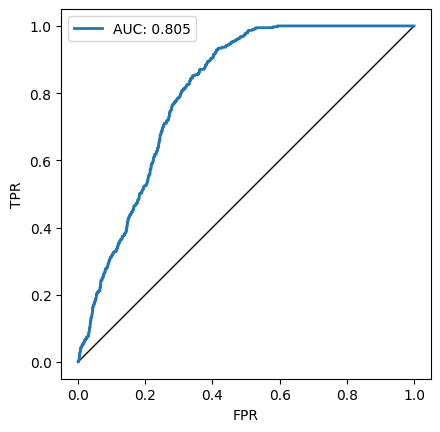

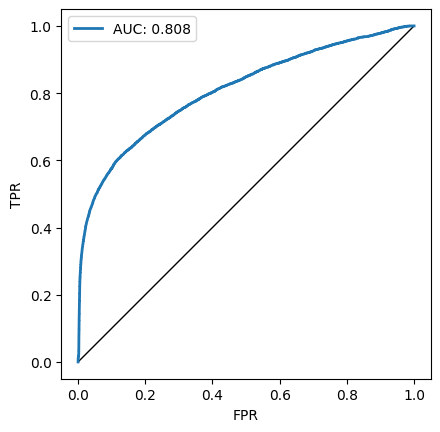

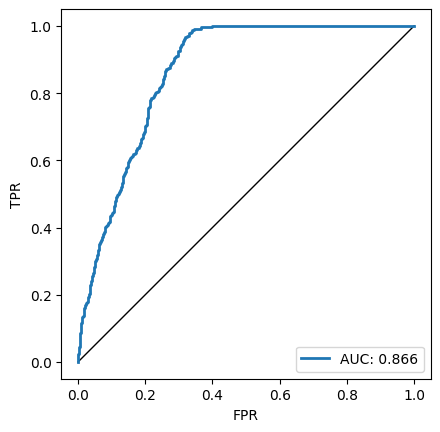

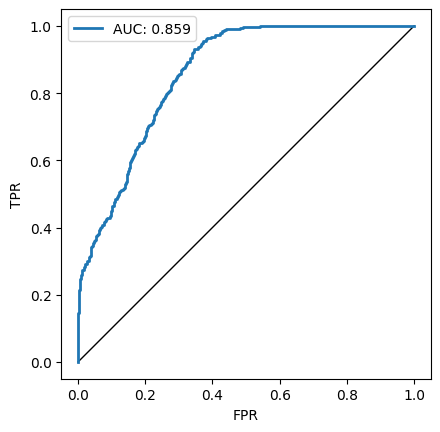

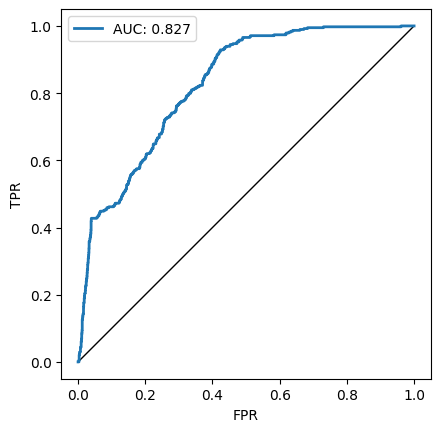

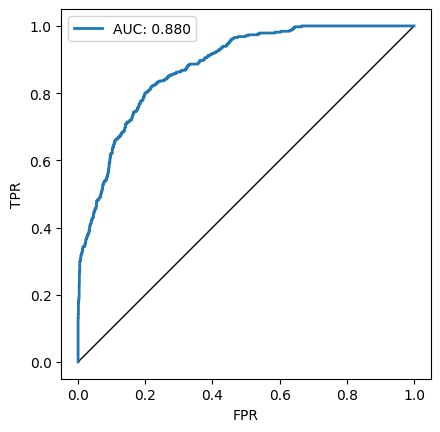

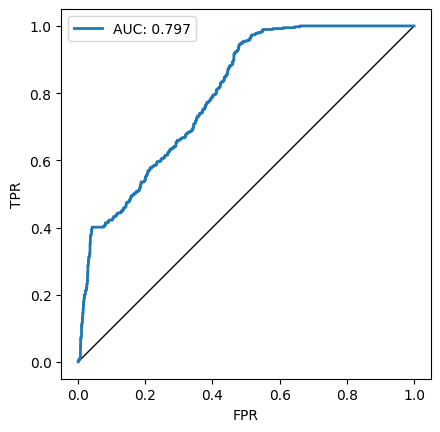

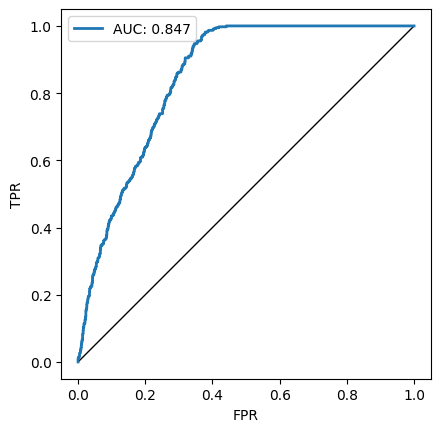

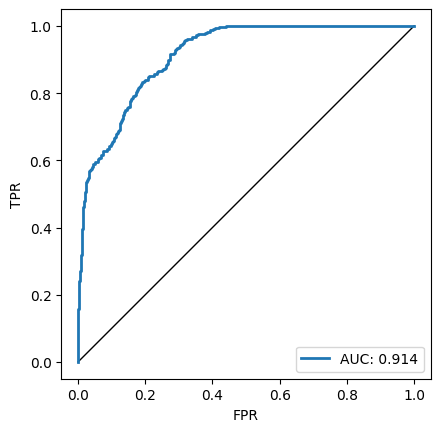

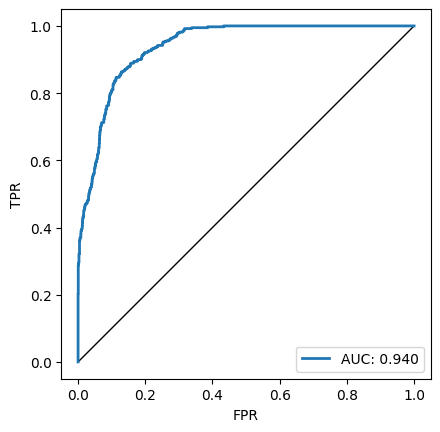

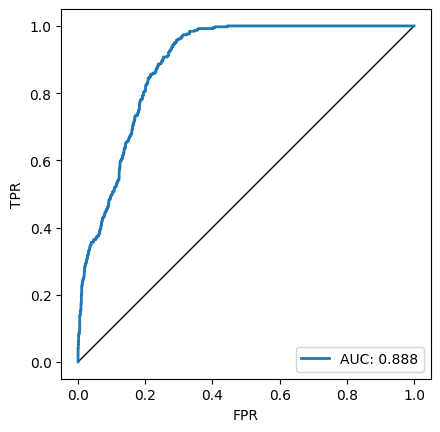

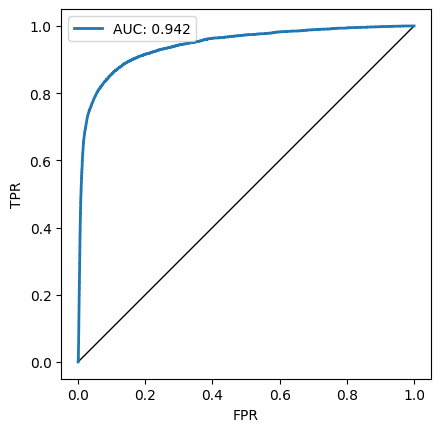

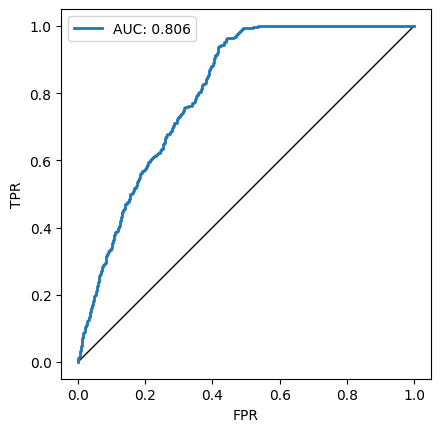

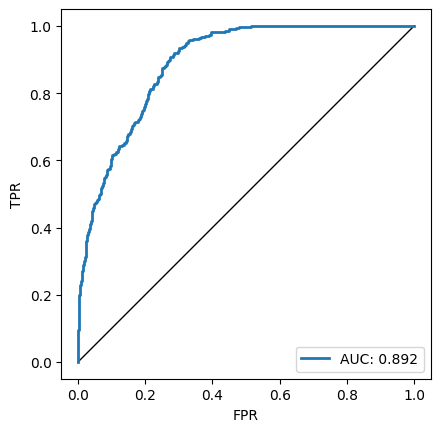

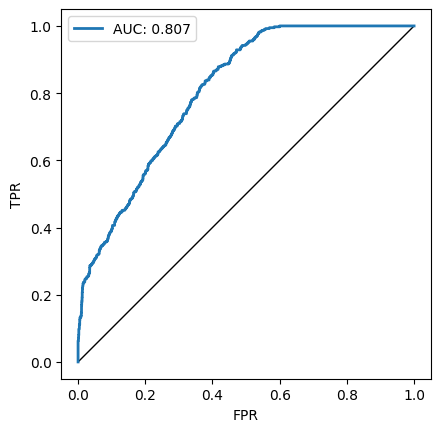

In [ ]:
from services.eval_privacy import compute_mia_attacks

attacks_results_list = []
figure_list = []
for model in models:
    attacks_result, figure = compute_mia_attacks(model, X_train_seq_datasets_original[0], X_test_seq, y_train_seq_datasets_original[0], y_test_seq)
    attacks_results_list.append(attacks_result)
    figure_list.append(figure)

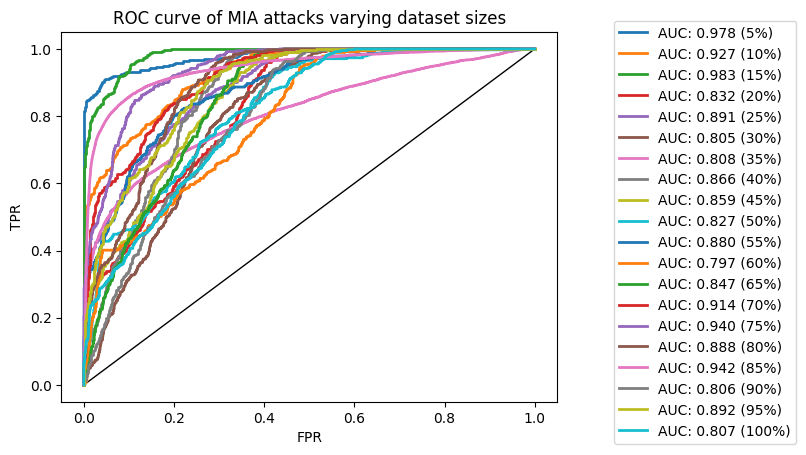

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

attacks_results_list[0].get_result_with_max_auc().roc_curve.fpr

fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k', lw=1.0)

for i, attacks_result in enumerate(attacks_results_list):
    x = attacks_result.get_result_with_max_auc().roc_curve.fpr
    y = attacks_result.get_result_with_max_auc().roc_curve.tpr
    plt.plot(x, y, lw=2, label=f'AUC: {metrics.auc(x, y):.3f} ({(i+1)*5}%)')
plt.title('ROC curve of MIA attacks varying dataset sizes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
from sklearn.metrics import classification_report

classification_reports = []
for model, X_train_seq, y_train_seq in zip(models, X_train_seq_datasets, y_train_seq_datasets):
    y_pred = model.predict(X_test_seq)
    cr = classification_report(y_test_seq, y_pred > 0.5, output_dict=True)
    classification_reports.append(cr)

2380/2380 [==============================] - 15s 6ms/step


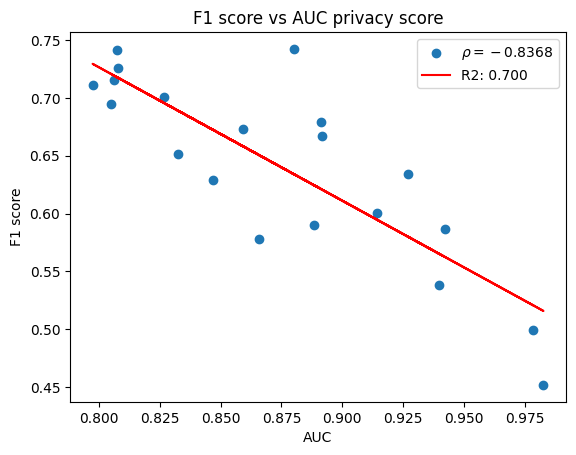

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

aucs = []
f1_scores = []
for cr, attacks_result in zip(classification_reports, attacks_results_list):
    x = attacks_result.get_result_with_max_auc().roc_curve.fpr
    y = attacks_result.get_result_with_max_auc().roc_curve.tpr
    auc = metrics.auc(x, y)
    f1_score = cr['1']['f1-score']

    aucs.append(auc)
    f1_scores.append(f1_score)

aucs = np.array(aucs).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(aucs, f1_scores)

rho = np.corrcoef(aucs.flatten(), f1_scores)[0, 1]
r2 = linear_model.score(aucs, f1_scores)

fig = plt.figure()
plt.title('F1 score vs AUC privacy score')
plt.scatter(aucs, f1_scores)
plt.plot(aucs, linear_model.predict(aucs), color='red')
plt.legend([fr'$\rho = {rho:.4f}$', f'R2: {r2:.3f}'])
plt.xlabel('AUC')
plt.ylabel('F1 score')
plt.show()